<a href="https://colab.research.google.com/github/moustafa-7/ChatBot-Project/blob/master/The_chat_bot_using_DL_seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import string
import pickle
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import codecs
#!wget -c http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip
#!unzip cornell_movie_dialogs_corpus.zip
with codecs.open("cornell movie-dialogs corpus/movie_lines.txt", "rb", encoding="utf-8", errors="ignore") as f:
    lines = f.read().split("\n")
    conversations = []
    for line in lines:
        data = line.split(" +++$+++ ")
        conversations.append(data)

In [0]:
chats = {}
for tokens in conversations:
  if len(tokens)>4:
    idx = tokens[0][1:]
    chat = tokens[4]
    chats [int(idx)] = chat

In [0]:
sorted_chats = sorted(chats.items(), key = lambda x: x[0])
#sorted_chats

In [0]:
conves_dict = {}
counter = 1
conves_ids = []
for i in range(1, len(sorted_chats)+1):
    if i < len(sorted_chats):
        if (sorted_chats[i][0] - sorted_chats[i-1][0]) == 1:
            if sorted_chats[i-1][1] not in conves_ids:
                conves_ids.append(sorted_chats[i-1][1])
            conves_ids.append(sorted_chats[i][1])
        elif (sorted_chats[i][0] - sorted_chats[i-1][0]) > 1:            
            conves_dict[counter] = conves_ids
            conves_ids = []
        counter += 1
    else:
        pass

In [0]:
#conves_dict

In [0]:
context_and_target = []

for conves in conves_dict.values():
  if (len(conves) % 2) != 0:
    conves = conves[:-1]
    
  for i in range(0, len(conves), 2):
    context_and_target.append((conves[i], conves[i+1]))
  


In [0]:
#context_and_target

In [0]:
context, target = zip(*context_and_target)

In [0]:
context = list(context)
target = list(target)

In [0]:
import re
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''

    text = text.lower()
    
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    
    return text

In [0]:
clean_target = []
for targ in target:
  clean_target.append(clean_text(targ))

In [0]:
clean_context =[]
for cont in context:
  clean_context.append(clean_text(cont))

In [0]:
#clean_context

In [0]:
# Beggining of a sentence <BOS>  and End of Senctence <EOS>
bos = '<BOS> '
eos = ' <EOS>'

final_target = [bos + targ + eos for targ in clean_target]
final_context = [bos + cont + eos for cont in clean_context]


In [17]:
import codecs
!wget https://github.com/samurainote/Automatic-Encoder-Decoder_Seq2Seq_Chatbot/raw/master/encoder_inputs.txt
with codecs.open("encoder_inputs.txt", 'rb', encoding = "utf-8", errors = "ignore") as f:
  lines = f.read().split('\n')
  encoder_text = []
  for line in lines:
    data = line.split('\n')[0]
    encoder_text.append(data)

--2019-06-07 04:16:44--  https://github.com/samurainote/Automatic-Encoder-Decoder_Seq2Seq_Chatbot/raw/master/encoder_inputs.txt
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/samurainote/Automatic-Encoder-Decoder_Seq2Seq_Chatbot/master/encoder_inputs.txt [following]
--2019-06-07 04:16:45--  https://raw.githubusercontent.com/samurainote/Automatic-Encoder-Decoder_Seq2Seq_Chatbot/master/encoder_inputs.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7854930 (7.5M) [text/plain]
Saving to: ‘encoder_inputs.txt.2’

encoder_inputs.txt. 100%[===================>]   7.49M  --.-KB/s    in 0.1s    

2019

In [23]:
encoder_text = encoder_text[0:14499]
len(encoder_text)

14499

In [0]:
encoder_text

In [20]:
!wget https://github.com/samurainote/Automatic-Encoder-Decoder_Seq2Seq_Chatbot/raw/master/decoder_inputs.txt

with codecs.open("decoder_inputs.txt", 'rb', encoding = "utf-8", errors = "ignore") as f:
  lines  = f.read().split('\n')
  decoder_text = []
  for line in lines:
    data = line.split('\n')[0]
    decoder_text.append(data) 

--2019-06-07 04:16:51--  https://github.com/samurainote/Automatic-Encoder-Decoder_Seq2Seq_Chatbot/raw/master/decoder_inputs.txt
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/samurainote/Automatic-Encoder-Decoder_Seq2Seq_Chatbot/master/decoder_inputs.txt [following]
--2019-06-07 04:16:52--  https://raw.githubusercontent.com/samurainote/Automatic-Encoder-Decoder_Seq2Seq_Chatbot/master/decoder_inputs.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9270194 (8.8M) [text/plain]
Saving to: ‘decoder_inputs.txt.2’

decoder_inputs.txt. 100%[===================>]   8.84M  --.-KB/s    in 0.1s    

2019

In [24]:
decoder_text = decoder_text[0:14499]
len(decoder_text)

14499

In [0]:
decoder_text

In [0]:
full_text = encoder_text + decoder_text

In [0]:
# dictionary = []
# print("Making dictionary of words.\n")
# for text in full_text:
#   words = text.split()
#   for i in range(0,len(words)):
#     if words[i] not in dictionary:
#       dictionary.append(words[i])

In [28]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
vocab_size = 14500
tokenizer = Tokenizer(num_words = vocab_size)

In [30]:
tokenizer.fit_on_texts(full_text)
word_index = tokenizer.word_index
len(word_index)

17294

In [0]:
index2word = {}
for k,v in word_index.items():
  if v<14500:
    index2word[v] = k
  if v>14500:
    continue

In [0]:
index2word

In [0]:
word2index = {}
for k,v in index2word.items():
  word2index[v] = k
  

In [38]:
len(word2index)

14499

In [0]:
encoder_sequences = tokenizer.texts_to_sequences(encoder_text)

In [0]:
decoder_sequences = tokenizer.texts_to_sequences(decoder_text)

In [41]:
len(encoder_sequences)

14499

In [0]:
for seqs in encoder_sequences:
  for seq in seqs:
    if seq>14499:
      print(seq)
      break

In [43]:
vocab_size = len(word2index)+1
vocab_size 

14500

In [0]:
decoder_output_data = None

In [0]:
import numpy as np
max_len = 20
num_samples = len(encoder_sequences)
num_samples
decoder_output_data = np.zeros((num_samples, max_len, vocab_size), dtype="float16")


In [0]:
decoder_output_data

In [0]:
for i, seqs in enumerate(decoder_input_data):
    for j, seq in enumerate(seqs):
        if j > 0:
            decoder_output_data[i][j][seq] = 1.

In [0]:
from keras.preprocessing.sequence import pad_sequences
encoder_input_data = pad_sequences(encoder_sequences, maxlen = max_len, dtype = 'int32', padding='post', truncating='post')
decoder_input_data = pad_sequences(decoder_sequences, maxlen = max_len, dtype = 'int32', padding = 'post', truncating = 'post')

In [48]:
decoder_input_data[0]

array([ 1, 32,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int32)

In [53]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
embeddings_index = {}
with open('glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print("Glove Loded!")

--2019-06-07 04:26:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-06-07 04:26:02--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-06-07 04:26:02--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
embedding_dimention = 50
def embedding_matrix_creater(embedding_dimention, word_index):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dimention))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [0]:
embedding_matrix = embedding_matrix_creater(50, word_index=word2index)


In [0]:
from keras.layers import Embedding
from keras.layers import Input, Dense, LSTM, TimeDistributed
from keras.models import Model

In [59]:
embed_layer = Embedding(input_dim=vocab_size, output_dim=50, trainable=True,)
embed_layer.build((None,))
embed_layer.set_weights([embedding_matrix])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
def seq2seq_model_builder(HIDDEN_DIM=300):
    
    encoder_inputs = Input(shape=(max_len, ), dtype='int32',)
    encoder_embedding = embed_layer(encoder_inputs)
    encoder_LSTM = LSTM(HIDDEN_DIM, return_state=True)
    encoder_outputs, state_h, state_c = encoder_LSTM(encoder_embedding)
    
    decoder_inputs = Input(shape=(max_len, ), dtype='int32',)
    decoder_embedding = embed_layer(decoder_inputs)
    decoder_LSTM = LSTM(HIDDEN_DIM, return_state=True, return_sequences=True)
    decoder_outputs, _, _ = decoder_LSTM(decoder_embedding, initial_state=[state_h, state_c])
    
    # dense_layer = Dense(VOCAB_SIZE, activation='softmax')
    outputs = TimeDistributed(Dense(vocab_size, activation='softmax'))(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], outputs)
    
    return model

In [0]:
model = seq2seq_model_builder(HIDDEN_DIM=300)


In [0]:
from keras.utils import plot_model
plot_model(model)

In [0]:
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])


In [0]:
BATCH_SIZE = 32
EPOCHS = 5

In [67]:
encoder_input_data.shape


(14499, 20)

In [68]:
history = model.fit([encoder_input_data, decoder_input_data], 
                     decoder_output_data, 
                     epochs=EPOCHS, 
                     batch_size=BATCH_SIZE)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
14499/14499 [==============================] - 57s 4ms/step - loss: 3.0342 - acc: 0.5312
Epoch 2/5
14499/14499 [==============================] - 54s 4ms/step - loss: 2.0992 - acc: 0.6408
Epoch 3/5
14499/14499 [==============================] - 54s 4ms/step - loss: 1.5192 - acc: 0.7556
Epoch 4/5
14499/14499 [==============================] - 54s 4ms/step - loss: 1.1340 - acc: 0.8103
Epoch 5/5
14499/14499 [==============================] - 55s 4ms/step - loss: 0.8065 - acc: 0.8488


In [0]:
BATCH_SIZE = 64
EPOCHS = 8

In [70]:
history = model.fit([encoder_input_data, decoder_input_data], 
                     decoder_output_data, 
                     epochs=EPOCHS, 
                     batch_size=BATCH_SIZE)

Epoch 1/8
14499/14499 [==============================] - 43s 3ms/step - loss: 0.5812 - acc: 0.8768
Epoch 2/8
14499/14499 [==============================] - 43s 3ms/step - loss: 0.4651 - acc: 0.8915
Epoch 3/8
14499/14499 [==============================] - 43s 3ms/step - loss: 0.3672 - acc: 0.9044
Epoch 4/8
14499/14499 [==============================] - 43s 3ms/step - loss: 0.2855 - acc: 0.9153
Epoch 5/8
14499/14499 [==============================] - 43s 3ms/step - loss: 0.2188 - acc: 0.9245
Epoch 6/8
14499/14499 [==============================] - 43s 3ms/step - loss: 0.1651 - acc: 0.9321
Epoch 7/8
14499/14499 [==============================] - 43s 3ms/step - loss: 0.1224 - acc: 0.9382
Epoch 8/8
14499/14499 [==============================] - 43s 3ms/step - loss: 0.0889 - acc: 0.9441


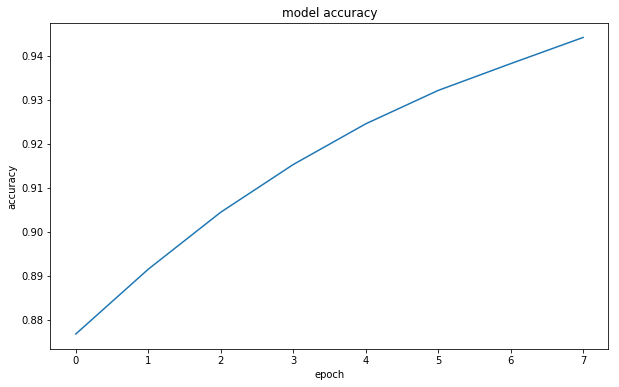

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

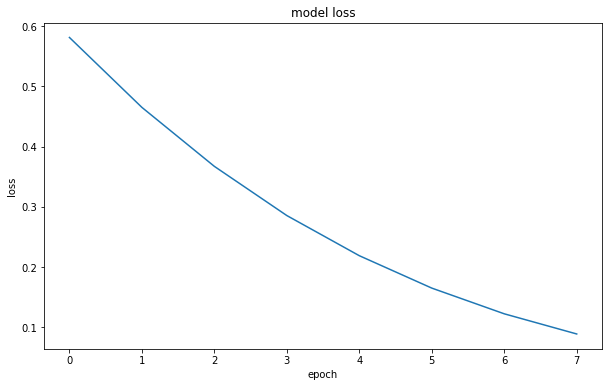

In [72]:

# 損失関数の可視化
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
with open('seq2seq.json',"w").write(model.to_json())

# 重みの読み込み
model.load_weights('seq2seq.h5')
print("Saved Model!")

SyntaxError: ignored

In [74]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("chatbot_model.h5")
print("Saved Model!")

Saved Model!


/usr/local/lib/python3.6/dist-packages/keras/engine/network.py:877: UserWarning: Layer lstm_2 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_1/while/Exit_3:0' shape=(?, 300) dtype=float32>, <tf.Tensor 'lstm_1/while/Exit_4:0' shape=(?, 300) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


In [75]:
json_string = model.to_json()
open('seq2seq.json', 'w').write(json_string)
model.save_weights('seq2seq_weights.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/network.py:877: UserWarning: Layer lstm_2 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_1/while/Exit_3:0' shape=(?, 300) dtype=float32>, <tf.Tensor 'lstm_1/while/Exit_4:0' shape=(?, 300) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


In [0]:
!wget https://www.dropbox.com/sh/o0rze9dulwmon8b/AAAEKe0FpShNMsLAJsuTY8Pwa/my_model_weights_bot.h5

In [0]:
!wget https://www.dropbox.com/sh/o0rze9dulwmon8b/AADiuIuRIHbB2-i9l_BewYoFa/my_model_weights_discriminator.h5

In [0]:
!wget https://www.dropbox.com/sh/o0rze9dulwmon8b/AAC3o1KWTAi0uETciZcy4-ava/my_model_weights.h5

In [0]:
!wget https://www.dropbox.com/sh/o0rze9dulwmon8b/AAAaJ1dHJ4Xke_QHl3gUeuyBa/my_model_weights20.h5